# Quantum Fourier Transform with Qiskit

## Quantum Fourier Transform

The quantum Fourier transform (QFT) is the quantum implementation of the discrete Fourier transform over the amplitudes of a wavefunction. It is part of many quantum algorithms, most notably Shor's factoring algorithm and quantum phase estimation.

The quantum Fourier transform (QFT) transforms between two bases, the computational (Z) basis, and the Fourier basis. The H-gate is the single-qubit QFT, and it transforms between the Z-basis states |0⟩ and |1⟩ to the X-basis states |+⟩ and |−⟩. In the same way, all multi-qubit states in the computational basis have corresponding states in the Fourier basis. The QFT is simply the function that transforms between these bases.

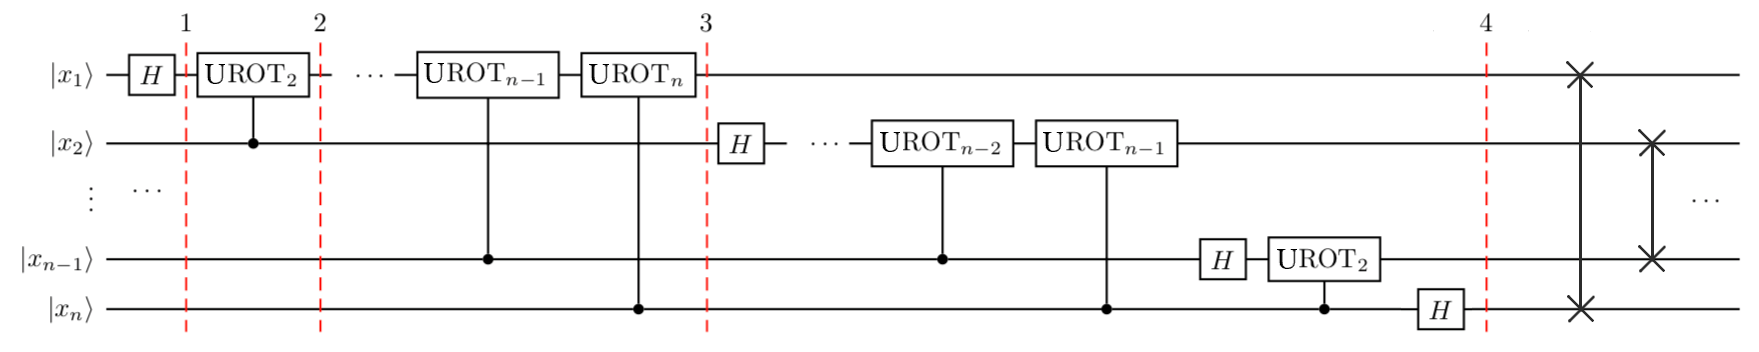

**Remember that Qiskit's least significant bit has the lowest index (0) means q2 has 0 index (little endian ordering), thus the circuit will be mirrored through the horizontal in relation to the above circuit image. Note that UROT is also known as CROT which means Controlled Rotations or Controlled Phasing (CP). Also note that interchanging the CP gates does not affect the output of the circuit.**

## Importing necessary libraries

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy import pi

## Defining the QFT Function 

In [2]:
# Function to compute the QFT

def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

    qft_rotations(circuit, n)

## Visualizing 3 Qubit QFT Circuit

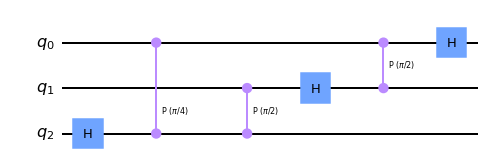

In [3]:
qc = QuantumCircuit(3)
qft_rotations(qc,3)
qc.draw('mpl')

## Function to SWAP Registers after QFT Computation 

In [4]:
# Function to SWAP the registers as seen in lecture
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

## QFT Function 

In [5]:
# Function to apply the QFT to the Quantum Circuit 
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

## QFT|000>

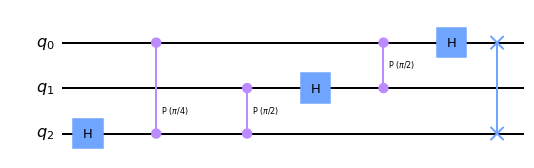

In [6]:
# QFT circuit for a 3 Qubit case at state |000>
qc = QuantumCircuit(3)
qft(qc,3)
qc.draw('mpl')

## Visualzing the QFT results using Bloch Sphere 


Quantum state is: [0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j
 0.354+0.j]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


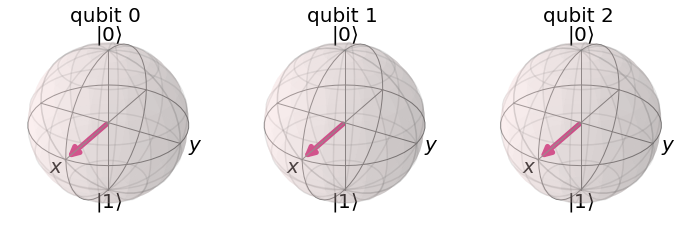

In [7]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc, backend).result().get_statevector(qc, decimals=3)

# Printing the state
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

The state received above is $QFT|000> = |+++>$

## QFT|101>

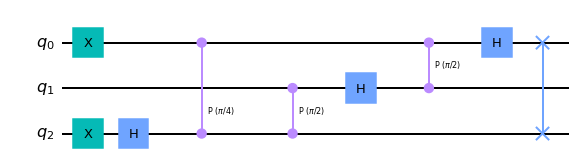

In [8]:
# Circuit for a 3 Qubit QFT
qc = QuantumCircuit(3)

# Encode the state 5 - |101>
qc.x(0)
qc.x(2)

# Applying the QFT to the circuit with input as |101>
qft(qc,3)
qc.draw('mpl')


Quantum state is: [ 0.354-0.j    -0.25 -0.25j   0.   +0.354j  0.25 -0.25j  -0.354+0.j
  0.25 +0.25j  -0.   -0.354j -0.25 +0.25j ]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


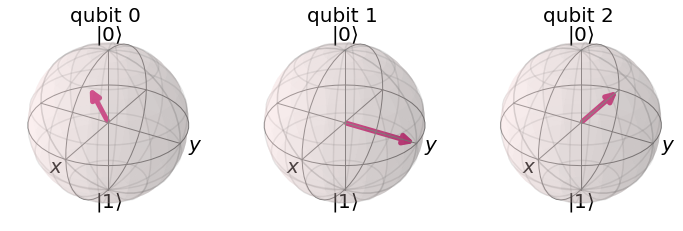

In [9]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc, backend).result().get_statevector(qc, decimals=3)

# Printing the state
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

The state $|\widetilde{5}>$ which we have received in the above diagram is the QFT of $|5> = |101>$ and comparing this state with the $QFT|000> = |+++>$, it can be seen that qubit 0 has $\frac{5}{8}$ of full turn, qubit 1 has $\frac{1}{4}$ of full turn and qubit 2 has $\frac{1}{2} $ of full turn as seen in the theory lectures. 

## Inverse Quantum Fourier Transform

We create the state $|\widetilde{5}>$ and run the QFT in reverse. Finally we verify that the output is the state $|5⟩ = |101>$ as expected.

In [10]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

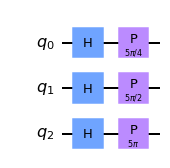

In [11]:
# Creating the QFT|101> state manually
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw('mpl')


Quantum state is: [ 0.354+0.j    -0.25 -0.25j  -0.   +0.354j  0.25 -0.25j  -0.354+0.j
  0.25 +0.25j  -0.   -0.354j -0.25 +0.25j ]


C:\Users\srinj\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


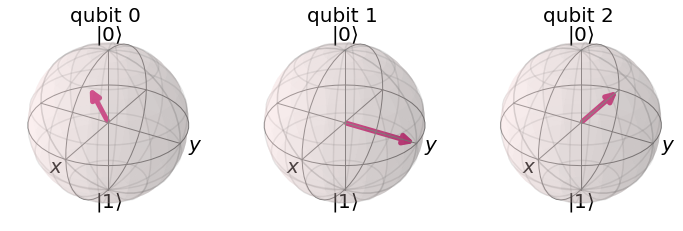

In [12]:
# Let's see the result of QFT|101>

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc, backend).result().get_statevector(qc, decimals=3)

# Printing the state
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)

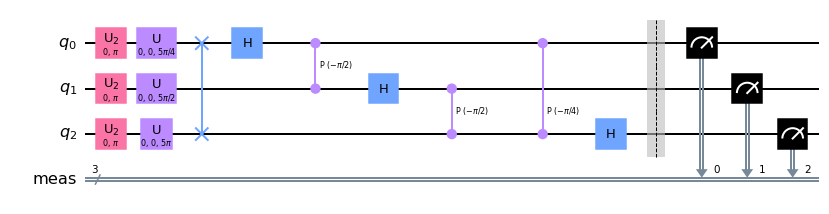

In [13]:
# Calling the inverse QFT Function
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw('mpl')


Total counts are: {'101': 1000}


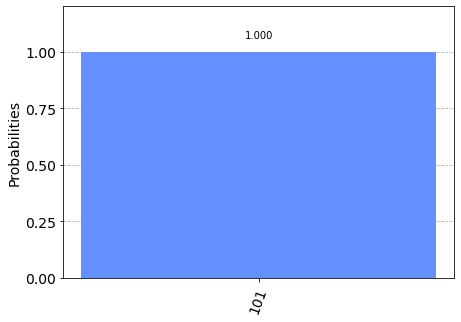

In [14]:
# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc, backend, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc)
print("\nTotal counts are:",counts)

# Plot the histogram
plot_histogram(counts)

As expected, we are able to get the state |101> which is number 5 in decimal. 